<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_3_Your_first_Classification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

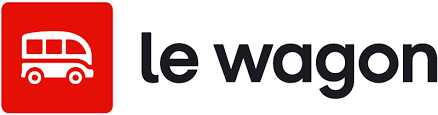

# The Titanic dataset

For your first **classification** task of the week, you'll work on a classic ML dataset - Titanic passengers!

The model we'll be using is **Logistic Regression**. \

We won't dwell too much today on why this model is best suited, but just remember that we're trying to classify something (whether a passenger survived or not), which is what **Logistic Regression** does.

## Import the data

Import the Titanic dataset using this link: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
Same as in the previous challenge, you can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
    
</details>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 08 - Machine Learning/ML_Titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Inspect the data

Have a look at the imported dataset! Try to scope out potential features and targets.

## Pick X and y

Ok, now that you've visualized the DataFrame, let's create **X** and **y**.


Try to model whether a passenger **Survived** or **not** based on the following features:

- `Pclass`: The class they were in
- `SibSp`: The number of siblings or spouses on the Titanic
- `Parch`: The number of parents or children on the Titanic
- `Fare`: How much they paid for their ticket

In [ ]:
X = df[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Train Test Split

Remember when we said that splitting the data is **one of the most important things in Machine Learning?**

Use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.


- Use `random_state=0` to compare your final results with your buddy's results.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.head(2)

,Pclass,SibSp,Parch,Fare
140,3,0,2,15.2458
439,2,0,0,10.5000


## Normalization

Now we need to normalize our features.

Use Sklearn's `Standard Scaler` to bring all of the features to the same scale.

Save your scaled features to two new variables named `X_train_scaled`and `X_test_scaled`.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.81925059, -0.46445234,  1.95926403, -0.33167904],
       [-0.38096838, -0.46445234, -0.47741019, -0.42640542],
       [-0.38096838,  0.41270964,  0.74092692,  0.10261958],
       ...,
       [ 0.81925059, -0.46445234, -0.47741019, -0.48162887],
       [ 0.81925059,  0.41270964, -0.47741019, -0.28868112],
       [-0.38096838,  0.41270964,  0.74092692,  0.14245584]])

## Modelling

Now we can actually run our ML model!

Import, instantiate and fit a **Logistic Regression** model on the training data.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Model Evaluation

Score your fitted model on your **test dataset**.

In [ ]:
model.score(X_test_scaled, y_test)

0.7150837988826816

How can we interpret this 71% score ?

<details>
<summary>Answer 💡</summary>

The default scoring metric for a **Logistic Regression** model is called the `accuracy`. \
It basically means that when running predictions on our test set, 71% of the returned values would be correctly predicted. You will get more information on the scoring metrics on future lectures.

</details>

## Prediction


We've found records of a passenger that weren't in the original dataset!

Use the model we've just created to predict whether they would have survived or not!


<details>
    <summary>Hint 🔍</summary>
    
Don't forget to normalize the data, but don't fit your scaler on this new data, just transform it (otherwise, you're causing **data leakage**).
    
     
</details>

In [ ]:
new_record = pd.DataFrame({"Pclass" : [1], "SibSp" : [0], "Parch" : [1], "Fare" : [65]})
new_record

,Pclass,SibSp,Parch,Fare
0,1,0,1,65


In [ ]:
new_record_scaled = scaler.transform(new_record)
model.predict(new_record_scaled)

array([1])

How do you interpret the result?


> **Your answer here (Double Click)**

**Congratulations on training your first classification model!** 🎉
